## Let's explore user interaction dataset

In [3]:
import pandas as pd

# load user interaction data
user_interaction_filename = "/content/drive/MyDrive/user-interactions.csv"
user_interaction_df = pd.read_csv(user_interaction_filename)

print("Shape of user interaction dataframe")
print(user_interaction_df.shape)

print("head of user interaction dataframe")
print(user_interaction_df.head())

Shape of user interaction dataframe
(10000000, 5)
head of user interaction dataframe
   Unnamed: 0           user_id      pratilipi_id  read_percent  \
0           0  5506791963854965  1377786220672965         100.0   
1           1  5506791979071996  1377786219742624          29.0   
2           2  5506791980256358  1377786217096334          22.0   
3           3  5506791988747277  1377786224767880         100.0   
4           4  5506791992372558  1377786218111595         100.0   

                updated_at  
0  2022-03-23 00:08:26.227  
1  2022-03-23 00:08:26.220  
2  2022-03-23 00:08:26.020  
3  2022-03-23 00:08:25.306  
4  2022-03-23 00:08:25.250  


In [4]:
# unique users in user interactions
user_list = user_interaction_df['user_id']
unique_users = set(user_list)
print("Number of unique users in user interactions")
print(len(unique_users))

# unique pratilipis in user interactions
pratilipi_list = user_interaction_df["pratilipi_id"]
unique_pratilipi = set(pratilipi_list)
print("Number of unique pratilipis in user interactions")
print(len(unique_pratilipi))

# unique (user, pratilipis) in user interactions
user_pratilipi_list = []
for x in range(len(user_list)):
    user_pratilipi_list.append((user_list[x], pratilipi_list[x]))

print("Number of unique (user, pratilipis) in user interactions")
print(len(set(user_pratilipi_list)))


Number of unique users in user interactions
355988
Number of unique pratilipis in user interactions
373138
Number of unique (user, pratilipis) in user interactions
10000000


In [5]:
# no of books read by a particular user
books_read = {}
for user in unique_users:
    books_read[user] = 0

for user in user_list:
    books_read[user] += 1

pratilipi_freq_per_user = []
for key, val in books_read.items():
    pratilipi_freq_per_user.append(val)

print("Max pratilipis read by a user")
print(max(pratilipi_freq_per_user))

print("Min book read by a user")
print(min(pratilipi_freq_per_user))

print("average book read by a user")
import statistics
print(statistics.mean(pratilipi_freq_per_user))

print("Number of users who read more than 1000 pratilipi")
above_1000 = sum(freq > 1000 for freq in pratilipi_freq_per_user)
print(above_1000)

print("Number of users who read 500 to 1000 pratilipi")
above_500 = sum(freq > 500 for freq in pratilipi_freq_per_user)
print(above_500 - above_1000)

print("Number of users who read 100 to 500 pratilipi")
above_100 = sum(freq > 100 for freq in pratilipi_freq_per_user)
print(above_100 - above_500)

print("Number of users who read 50 to 100 pratilipi")
above_50 = sum(freq > 50 for freq in pratilipi_freq_per_user)
print(above_50 - above_100)

print("Number of users who read 20 to 50 pratilipi")
above_20 = sum(freq > 20 for freq in pratilipi_freq_per_user)
print(above_20 - above_50)

print("Number of users who less than or equal to 20 pratilipi")
below_or_20 = sum(freq <= 20 for freq in pratilipi_freq_per_user)
print(below_or_20)

Max pratilipis read by a user
1793
Min book read by a user
1
average book read by a user
28.090834522511994
Number of users who read more than 1000 pratilipi
30
Number of users who read 500 to 1000 pratilipi
660
Number of users who read 100 to 500 pratilipi
27074
Number of users who read 50 to 100 pratilipi
25564
Number of users who read 20 to 50 pratilipi
41183
Number of users who less than or equal to 20 pratilipi
261477


In [6]:
read_percent = user_interaction_df["read_percent"]

unique_read_percent = sorted(list(set(read_percent)))
print("Unique percent count")
print(len(unique_read_percent))

Unique percent count
24772


read_percent are in float, round it to integer

In [7]:
# get number of rows with read percent > 100
above_100_count = 0
for val in read_percent:
    if val > 100:
        above_100_count += 1
print("Above 100 percent count")
print(above_100_count)

# get number of rows with read percent < 0
below_100_count = 0
for val in read_percent:
    if val < 0:
        below_100_count += 1
print("Below 100 percent count")
print(below_100_count)


Above 100 percent count
139
Below 100 percent count
0


read percent can't be greater than 0 or less than 0, remove it

In [8]:
# for simplification lets round read percent to nearest integer
read_percent_rounded = [round(rp) for rp in read_percent]
unique_read_percent_rounded = list(set(read_percent_rounded))

# count read percent frequency
read_percent_to_freq = {}
for val in unique_read_percent_rounded:
    read_percent_to_freq[val] = 0

for val in read_percent_rounded:
    read_percent_to_freq[val] += 1

freq_vector = [read_percent_to_freq[rp] for rp in unique_read_percent_rounded]

print("Unique frequency percent rounded")
print(unique_read_percent_rounded)

print("Frequency vector")
print(freq_vector)

Unique frequency percent rounded
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 105, 106, 107, 108, 109, 110, 111, 112, 114, 117, 120, 121, 122, 123, 125, 128, 129, 130, 132, 133, 140, 143, 150, 160, 162, 167, 170, 175, 1200, 177, 180, 700, 200, 217, 225, 286, 800, 300, 2400, 900, 400, 420, 425, 600, 500]
Frequency vector
[37791, 886, 4601, 9382, 16965, 19904, 20936, 21138, 28934, 19304, 44675, 4762, 31597, 32809, 6994, 39433, 8582, 42348, 3699, 11304, 45476, 1991, 4889, 13730, 5080, 45925, 1208, 3900, 6932, 16127, 8179, 3928, 3253, 2240, 50171, 1924, 3742, 5362, 9600, 4071, 20363, 1350, 4563, 11397, 2242, 6866, 5138, 3877, 2131, 1021, 66644, 

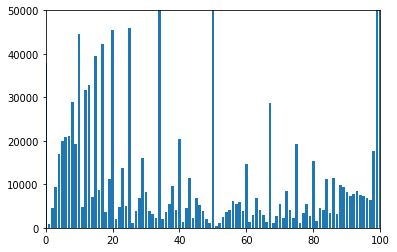

In [13]:
# let's plot it
import matplotlib.pyplot as plt

plt.bar(unique_read_percent_rounded, freq_vector)
plt.xlim([0, 100])
plt.ylim([0, 50000])
plt.show()

## Let's explore metadata dataset

In [1]:
import pandas as pd

# load metadata
metadata_filename = "/content/drive/MyDrive/metadata.csv"
metadata_df = pd.read_csv(metadata_filename)

print("Shape of user interaction dataframe")
print(metadata_df.shape)

print("Head of user interaction dataframe")
print(metadata_df.head())

Shape of user interaction dataframe
(954501, 6)
Head of user interaction dataframe
          author_id      pratilipi_id category_name  reading_time  \
0 -3418949279741297  1025741862639304   translation             0   
1 -2270332351871840  1377786215601277   translation           171   
2 -2270332352037261  1377786215601962   translation            92   
3 -2270332352521845  1377786215640994   translation             0   
4 -2270332349665658  1377786215931338   translation            47   

            updated_at         published_at  
0  2020-08-19 15:26:13  2016-09-30 10:37:04  
1  2021-01-21 16:27:07  2018-06-11 13:17:48  
2  2020-09-29 12:33:57  2018-06-12 04:19:12  
3  2019-10-17 09:03:37  2019-09-26 14:58:53  
4  2020-05-05 11:33:41  2018-11-25 12:28:23  


In [14]:
# unique authors in metadata
author_list = metadata_df['author_id']
unique_authors = set(author_list)
print("Number of unique authors in metadata")
print(len(unique_authors))

# unique pratilipis in metadata
pratilipi_list = metadata_df["pratilipi_id"]
unique_pratilipi = set(pratilipi_list)
print("Number of unique pratilipis in metadata")
print(len(unique_pratilipi))

# unique (author, pratilipis) in metadata
author_pratilipi_list = []
for x in range(len(author_list)):
    author_pratilipi_list.append((author_list[x], pratilipi_list[x]))

print("Number of unique (author, pratilipis) in metadata")
print(len(set(user_pratilipi_list)))

Number of unique authors in metadata
64900
Number of unique pratilipis in metadata
486693
Number of unique (author, pratilipis) in metadata
10000000


In [17]:
read_time = metadata_df["reading_time"]

print("Number of rows with < 0 seconds")
print(sum(1 for i in read_time if i == 0))

print("Number of rows with read time == 0 seconds")
print(sum(1 for i in read_time if i == 0))

print("Number of rows with read time > 0 sec and read time < 2 mins")
print(sum(1 for i in read_time if i > 0 and i < 120))

print("Number of rows with read time > 2 mins and read time < 10 mins")
print(sum(1 for i in read_time if i > 0 and i < 10*60))

print("Number of rows with read_time >= 10 mins and read_time < 30 mins")
print(sum(1 for i in read_time if i >= 10*60 and i < 30*60))

print("Number of rows with read_time >= 30 mins and read_time < 120 mins")
print(sum(1 for i in read_time if i >= 30*60 and i < 120*60))

print("Number of rows with read time > 120 mins")
print(sum(1 for i in read_time if i > 120*60))

Number of rows with < 0 seconds
4055
Number of rows with read time == 0 seconds
4055
Number of rows with read time > 0 sec and read time < 2 mins
251173
Number of rows with read time > 2 mins and read time < 10 mins
797104
Number of rows with read_time >= 10 mins and read_time < 30 mins
145022
Number of rows with read_time >= 30 mins and read_time < 120 mins
7844
Number of rows with read time > 120 mins
476
